<a href="https://colab.research.google.com/github/OmarMoghazy/Image-Segmentation/blob/main/evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

For k = 3
M1: F-Measure = 0.5162562870605036, Conditional Entropy = 2.179905632013452
M2: F-Measure = 0.5161561336062136, Conditional Entropy = 1.902515810037052
M3: F-Measure = 0.5605042257197956, Conditional Entropy = 1.56397304040943
M4: F-Measure = 0.5518392880409068, Conditional Entropy = 1.52200443384313
M5: F-Measure = 0.4498266309992474, Conditional Entropy = 2.053841562056186
Average F-Measure =0.5189165130853335, Average Conditional Entropy = 1.84444809567185
For k = 5
M1: F-Measure = 0.4227730927547259, Conditional Entropy = 2.126213909865702
M2: F-Measure = 0.4235769061417778, Conditional Entropy = 1.86672107869519
M3: F-Measure = 0.4272277516682055, Conditional Entropy = 1.52698213969912
M4: F-Measure = 0.4776998517043995, Conditional Entropy = 1.48108995159686
M5: F-Measure = 0.3654025304098648, Conditional Entropy = 2.021579717291338
Average F-Measure =0.4233360265357947, Average Conditional Entropy = 1.8045173594296418
For k = 7
M1: F-Measure = 0.3750680771208406, Condi

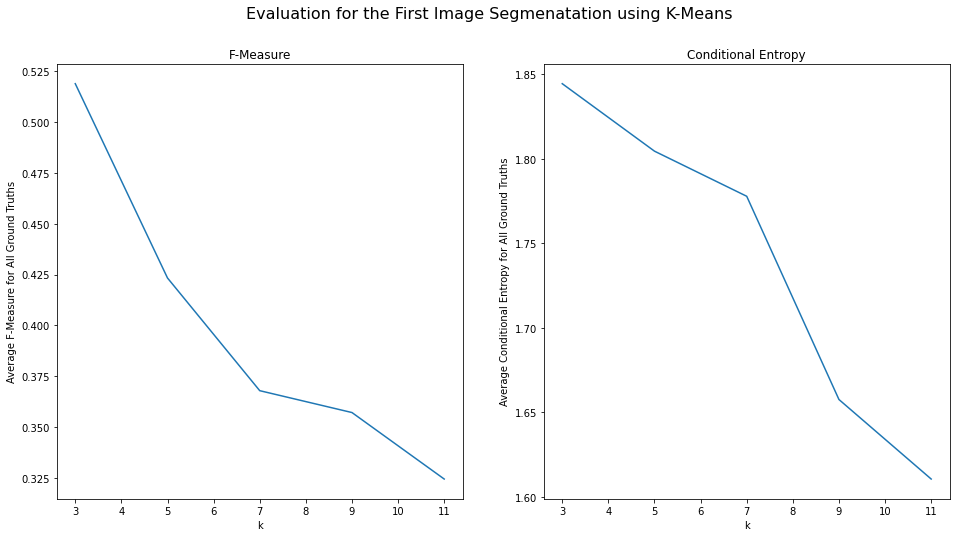

In [ ]:
df = pd.read_excel("drive/MyDrive/data/evaluation/evaluation.xlsx", index_col=0)

# using first image
average_fmeasures_1 = []
average_c_entropies_1 = []
ks = [3,5,7,9,11]
for i, k in zip(range(5), [3,5,7,9,11]):
  print("For k =", k)
  I = df.loc[(df['n']==0) & (df['k'] == k)]
  for ind in I.index:
    print("M" + str(ind%5+1) + ": F-Measure = " + str(I['F-Measures'][ind]) + ", Conditional Entropy = " + str(I['Conditional Entropy'][ind]))
    # print("Conditional Entropy = " + str(I['Conditional Entropy'][ind]))
  print("=============================================================")
  average_fmeasure = I['F-Measures'].mean()
  average_c_entropy = I['Conditional Entropy'].mean()
  print("Average F-Measure =" + str(average_fmeasure) + ", Average Conditional Entropy = " + str(average_c_entropy))
  average_fmeasures_1.append(average_fmeasure)
  average_c_entropies_1.append(average_c_entropy)
  
fig, axes = plt.subplots(1,2)
fig.suptitle('Evaluation for the First Image Segmenatation using K-Means', fontsize=16)
fig.set_size_inches((16,8))
axes[0].plot(ks, average_fmeasures_1)
axes[0].title.set_text('F-Measure')
axes[0].set_xlabel('k')
axes[0].set_ylabel('Average F-Measure for All Ground Truths')
axes[1].plot(ks, average_c_entropies_1)
axes[1].title.set_text('Conditional Entropy')
axes[1].set_xlabel('k')
axes[1].set_ylabel('Average Conditional Entropy for All Ground Truths')

plt.show()

Average Per Dataset:
k = 3: Average F-Measure: 0.5349843050904046 Average Conditional Entropy: 1.8736387275431792
k = 5: Average F-Measure: 0.45601913058582627 Average Conditional Entropy: 1.7083121106177734
k = 7: Average F-Measure: 0.4001260448356648 Average Conditional Entropy: 1.599779734968415
k = 9: Average F-Measure: 0.34895834097963563 Average Conditional Entropy: 1.5444296337387273
k = 11: Average F-Measure: 0.31793090621081427 Average Conditional Entropy: 1.49408567128161


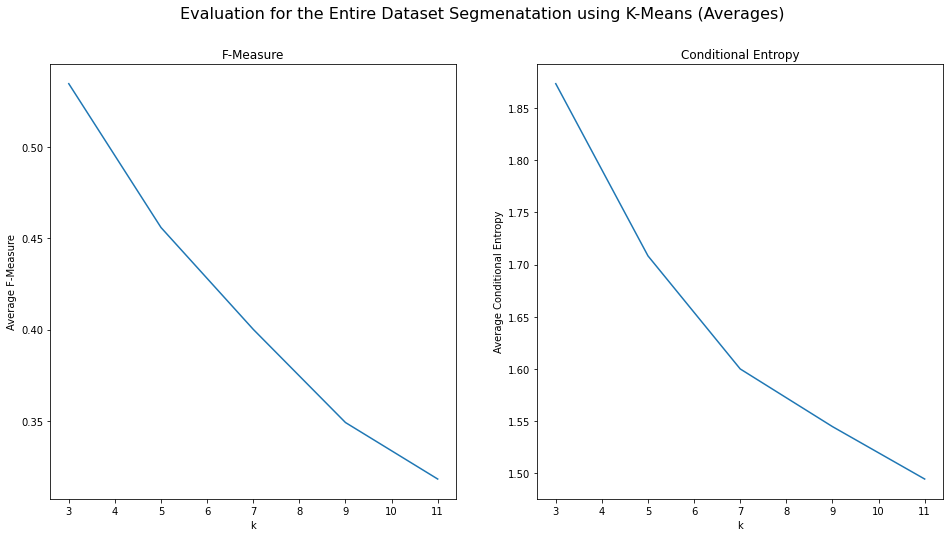

In [ ]:
df = pd.read_excel("drive/MyDrive/data/evaluation/evaluation.xlsx", index_col=0)

# using first image
ks = [3,5,7,9,11]
xs = df.groupby('n').count().shape[0]
ARRAY_OF_AVERAGES_F = []
ARRAY_OF_AVERAGES_C = []
for x in range(xs):
  average_fmeasures = []
  average_c_entropies = []
  for i, k in zip(range(5), [3,5,7,9,11]):
    I = df.loc[(df['n']==x) & (df['k'] == k)]
    average_fmeasure = I['F-Measures'].mean()
    average_c_entropy = I['Conditional Entropy'].mean()
    average_fmeasures.append(average_fmeasure)
    average_c_entropies.append(average_c_entropy)
  ARRAY_OF_AVERAGES_F.append(average_fmeasures)
  ARRAY_OF_AVERAGES_C.append(average_c_entropies)

a_f = np.mean(np.array(ARRAY_OF_AVERAGES_F), axis=0)
a_c = np.mean(np.array(ARRAY_OF_AVERAGES_C), axis=0)

print("Average Per Dataset:")
for i,k in zip(range(5),ks):
  print("k =", str(k) + ":", "Average F-Measure:", a_f[i], "Average Conditional Entropy:", a_c[i])

fig, axes = plt.subplots(1,2)
fig.suptitle('Evaluation for the Entire Dataset Segmenatation using K-Means (Averages)', fontsize=16)
fig.set_size_inches((16,8))
axes[0].plot(ks, a_f)
axes[0].title.set_text('F-Measure')
axes[0].set_xlabel('k')
axes[0].set_ylabel('Average F-Measure')
axes[1].plot(ks, a_c)
axes[1].title.set_text('Conditional Entropy')
axes[1].set_xlabel('k')
axes[1].set_ylabel('Average Conditional Entropy')

plt.show()


# Bonus

For k = 3
M1: F-Measure = 0.7598415358876042, Conditional Entropy = 1.849227960558913
M2: F-Measure = 0.76013951808631, Conditional Entropy = 1.54392510718824
M3: F-Measure = 0.8652820249075901, Conditional Entropy = 1.195140892303673
M4: F-Measure = 0.8613273877403789, Conditional Entropy = 1.168990073341421
M5: F-Measure = 0.7598115947791562, Conditional Entropy = 1.688192876457182
Average F-Measure =0.8012804122802077, Average Conditional Entropy = 1.489095381969886
For k = 5
M1: F-Measure = 0.7432335289319142, Conditional Entropy = 1.454136293293607
M2: F-Measure = 0.735319169294858, Conditional Entropy = 1.194787556909414
M3: F-Measure = 0.7074625495571198, Conditional Entropy = 0.9238215092463202
M4: F-Measure = 0.7062991598606053, Conditional Entropy = 0.9091842605907835
M5: F-Measure = 0.6993033062605222, Conditional Entropy = 1.345912740754088
Average F-Measure =0.7183235427810039, Average Conditional Entropy = 1.1655684721588426
For k = 7
M1: F-Measure = 0.6096467254658946, C

Text(0, 0.5, 'Average Conditional Entropy for All Ground Truths')

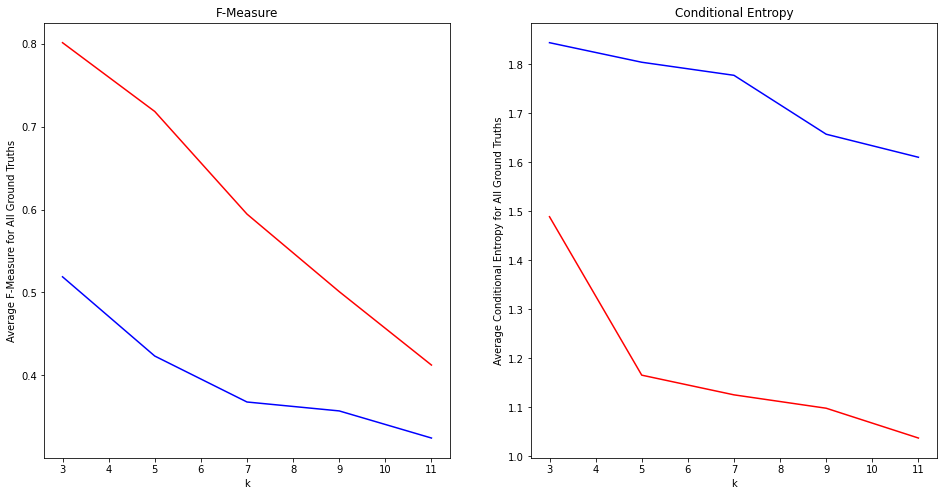

In [ ]:
df = pd.read_excel("drive/MyDrive/data/evaluation/evaluation_BONUS_KMEANS.xlsx", index_col=0)
# using first image
average_fmeasures = []
average_c_entropies = []
ks = [3,5,7,9,11]
for i, k in zip(range(5), [3,5,7,9,11]):
  print("For k =", k)
  I = df.loc[(df['n']==0) & (df['k'] == k)]
  for ind in I.index:
    print("M" + str(ind%5+1) + ": F-Measure = " + str(I['F-Measures'][ind]) + ", Conditional Entropy = " + str(I['Conditional Entropy'][ind]))
    # print("Conditional Entropy = " + str(I['Conditional Entropy'][ind]))
  print("=============================================================")
  average_fmeasure = I['F-Measures'].mean()
  average_c_entropy = I['Conditional Entropy'].mean()
  print("Average F-Measure =" + str(average_fmeasure) + ", Average Conditional Entropy = " + str(average_c_entropy))
  average_fmeasures.append(average_fmeasure)
  average_c_entropies.append(average_c_entropy)
fig, axes = plt.subplots(1,2)
fig.set_size_inches((16,8))
axes[0].plot(ks, average_fmeasures, color='r')
axes[0].plot(ks, average_fmeasures_1, color='b')
axes[0].title.set_text('F-Measure')
axes[0].set_xlabel('k')
axes[0].set_ylabel('Average F-Measure for All Ground Truths')
axes[1].plot(ks, average_c_entropies, color='r')
axes[1].plot(ks, average_c_entropies_1, color='b')
axes[1].title.set_text('Conditional Entropy')
axes[1].set_xlabel('k')
axes[1].set_ylabel('Average Conditional Entropy for All Ground Truths')



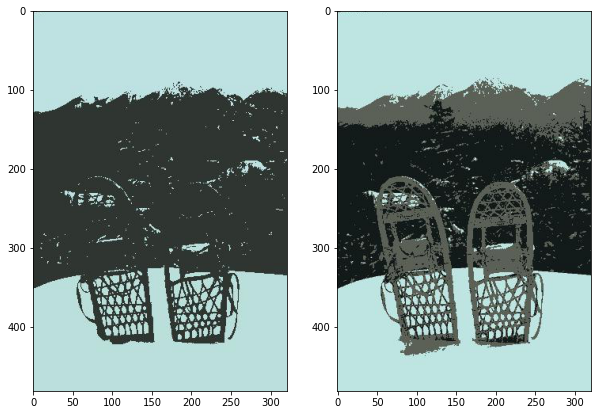

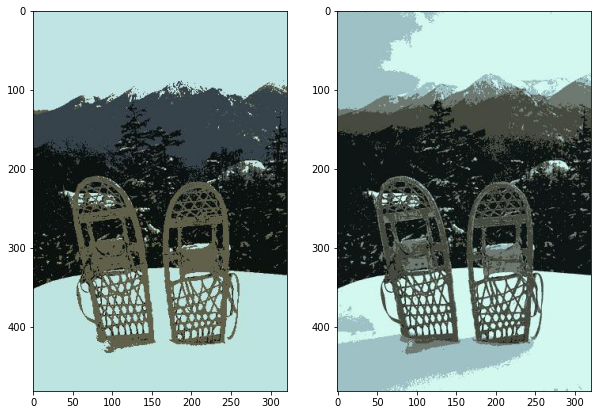

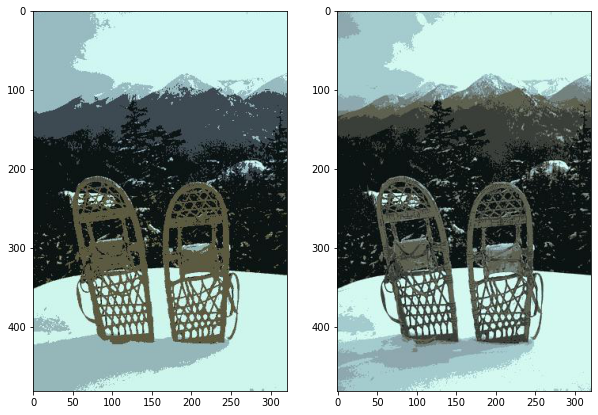

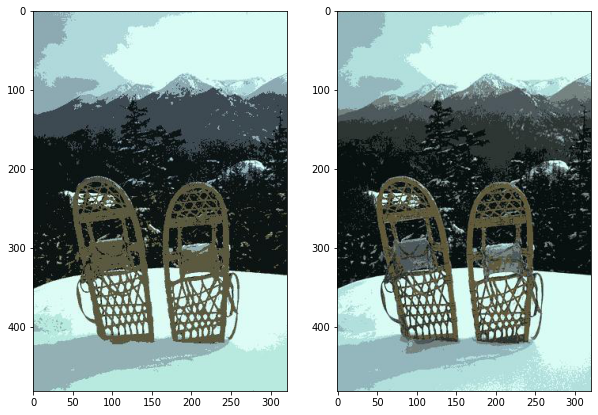

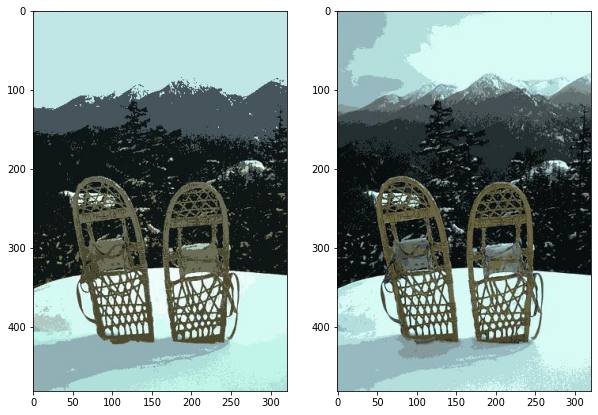

In [ ]:
for k in [3,5,7,9,11]:
  fig, axes = plt.subplots(1,2)
  fig.set_size_inches(10,10)
  spatial = Image.open('drive/MyDrive/data/Bonus/BONUS KMEANS_k'+str(k)+'.jpg')
  not_spatial = Image.open('drive/MyDrive/data/output by TEAM/0 k'+str(k)+'.jpg')
  axes[0].imshow(spatial)
  axes[1].imshow(not_spatial)

plt.show()